# ***IMPORT LIBRARY***


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

# ***PREPROCESSING***

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/money/Train',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/money/Validation',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 110 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


In [ ]:
train_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

# ***CREATE MODEL***

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(11,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# ***TRAIN MODEL***

In [ ]:
history = model.fit(train_set,batch_size=32,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
10/10 [==============================] - 1s 74ms/step - loss: 0.1998 - accuracy: 0.9636 - val_loss: 0.6309 - val_accuracy: 0.8182
Epoch 2/20
10/10 [==============================] - 1s 66ms/step - loss: 0.1245 - accuracy: 0.9636 - val_loss: 0.3468 - val_accuracy: 0.8545
Epoch 3/20
10/10 [==============================] - 1s 66ms/step - loss: 0.0776 - accuracy: 0.9818 - val_loss: 0.2953 - val_accuracy: 0.9091
Epoch 4/20
10/10 [==============================] - 1s 66ms/step - loss: 0.0751 - accuracy: 0.9818 - val_loss: 0.4997 - val_accuracy: 0.8545
Epoch 5/20
10/10 [==============================] - 1s 68ms/step - loss: 0.0413 - accuracy: 0.9909 - val_loss: 0.5331 - val_accuracy: 0.8727
Epoch 6/20
10/10 [==============================] - 1s 69ms/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.5461 - val_accuracy: 0.8727
Epoch 7/20
10/10 [==============================] - 1s 71ms/step - loss: 0.0592 - accuracy: 0.9909 - val_loss: 0.4723 - val_accuracy: 0.8909
Epoch 8/20
10

# ***EVALUATE***

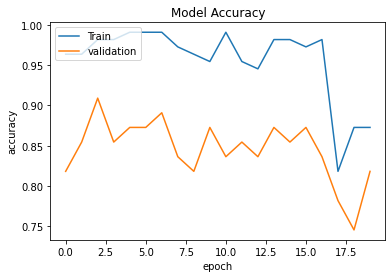

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Loss: ',score[0])
print('Accuracy: ',score[1])

5/5 [==============================] - 0s 41ms/step - loss: 0.7148 - accuracy: 0.8182
Loss:  0.7148048877716064
Accuracy:  0.8181818127632141


In [ ]:
model.save('Money.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('Money.h5')

# ***PREDICT***

In [ ]:
def predict(result):
  if round(result[0][0])==1:
    prediction="1000"
  elif round(result[0][1])==1:
    prediction="10000"
  elif round(result[0][2])==1:
    prediction="100000"
  elif round(result[0][3])==1:
    prediction="200"  
  elif round(result[0][4])==1:
    prediction="2000" 
  elif round(result[0][5])==1:
    prediction="20000"
  elif round(result[0][6])==1:
    prediction="200000"  
  elif round(result[0][7])==1:
    prediction="500" 
  elif round(result[0][8])==1:
    prediction="5000"
  elif round(result[0][9])==1:
    prediction="50000" 
  elif round(result[0][10])==1:
    prediction="500000"
  print('dự đoán:', prediction)
  prediction==0

dự đoán: 5000


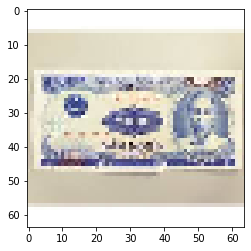

In [ ]:
test_img=load_img('/content/drive/MyDrive/money/Validation/5000/image (3).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dự đoán: 500


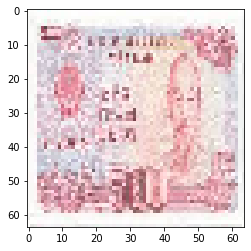

In [ ]:
test_img=load_img('/content/drive/MyDrive/money/Validation/500/image.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)

dự đoán: 10000


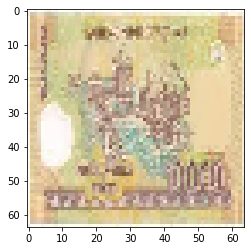

In [ ]:
test_img=load_img('/content/drive/MyDrive/money/Validation/10000/image (1).png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
predict(result)